# Jimmy Liang

CMPE 258 Assignment 1 Part 1

SJSU: 001869817


In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 20.2MB/s 
     |████████████████████████████████| 1.2MB 58.0MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 194kB 60.6MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

# Is it a dog?

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

learn_isdog = cnn_learner(dls, resnet34, metrics=error_rate)
learn_isdog.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.122491,0.020252,0.006089,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.057634,0.012449,0.004060,00:53


In [7]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Trying on a non-traditional looking cat

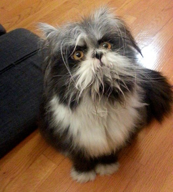

In [8]:
img0 = PILImage.create(uploader.data[0])
img0.to_thumb(192)

And a dog in custome

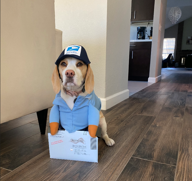

In [9]:
img1 = PILImage.create(uploader.data[0])
img1.to_thumb(192)

In [11]:
is_dog,_,probs = learn_isdog.predict(img0)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: False.
Probability it's a dog: 0.000000


The learner got it right, the cat picture is not a dog.

In [12]:
is_dog,_,probs = learn_isdog.predict(img1)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999921


The learner got it right, the dog in costume is a dog.

# Image Segmentation

In [13]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn_segment = unet_learner(dls, resnet34)
learn_segment.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.868977,2.474510,00:01


epoch,train_loss,valid_loss,time
0,1.885143,1.662775,00:01
1,1.641276,1.514685,00:01
2,1.496134,1.467598,00:01
3,1.412827,1.118764,00:01
4,1.297847,1.004911,00:01
5,1.192730,0.919447,00:01
6,1.099184,0.858590,00:01
7,1.025249,0.844817,00:01


Showing segmentation results

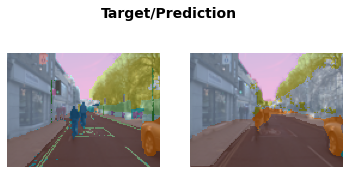

In [20]:

learn_segment.show_results(max_n=2)

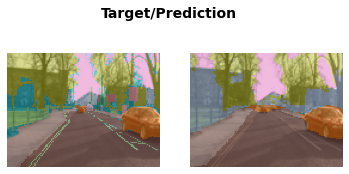

In [21]:
learn_segment.show_results(max_n=2)

# Movie Review Learner

In [23]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn_review = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn_review.fine_tune(4, 1e-2)

A new version of this dataset is available, downloading...


epoch,train_loss,valid_loss,accuracy,time
0,0.462929,0.425406,0.805840,03:39


epoch,train_loss,valid_loss,accuracy,time
0,0.307367,0.235186,0.905800,07:24
1,0.243470,0.201012,0.920320,07:24
2,0.184806,0.192525,0.927280,07:25
3,0.144846,0.186910,0.929760,07:24


Basic Test

In [24]:
learn_review.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0022, 0.9978]))

1-star review for WandaVision from the internet

In [25]:
learn_review.predict("Boring, tired sitcom humor with very few vague \"clues\" to what is really going on. Sure, they did a great job in production making it look like true vintage video but that can only keep the viewer entertained a little; not for three episodes. The only reason I continue to watch is in hope that she breaks out of the current sitcom world she's trapped in and into a gripping storyline with real action and suspense. These first 3 episodes were by far the most fast forward worthy episodes from start to finish that I have ever seen from Marvel.")

('pos', tensor(1), tensor([0.2984, 0.7016]))

5-star review for WandaVision from the internet

In [26]:
learn_review.predict("It feels so good to be back in the MCU, and man is it fun. It really has been a while and I am really glad we have something so good to get back to. This show grasps all the sitcom cliches without even once parodizing them. I have only seen the first two episodes but I already love this show. It perfectly represents The Dick Van Dyke Show and Bewitched. LIzzie is great and i've always loved Wanda, but this really is a new Vision. Paul perfectly plays this role, and now I really love this character. The two have fantastic chemistry (as we have seen in past films) and the supporting cast Just benefits it even more. Kathryn Hahn was born to play Agnes, and the guy who plays phil does a fantastic job. The comedy in this show is perfect to the decade and the little bits of mystery keep me dying till next Friday. I would definitely recommend this show to any marvel fan.")

('pos', tensor(1), tensor([3.4818e-05, 9.9997e-01]))

# Tabular Learner for decisiontree

In [30]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn_tabular = tabular_learner(dls, metrics=accuracy)

In [31]:
learn_tabular.fit_one_cycle(3)


epoch,train_loss,valid_loss,accuracy,time
0,0.361709,0.362177,0.836302,00:04
1,0.349450,0.349576,0.841677,00:04
2,0.334883,0.349305,0.842752,00:05


# Colaborative Learner

In [32]:

from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn_collab = collab_learner(dls, y_range=(0.5,5.5))
learn_collab.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.514030,1.415018,00:00


epoch,train_loss,valid_loss,time
0,1.372787,1.354541,00:00
1,1.257329,1.168999,00:00
2,1.023185,0.867915,00:00
3,0.808264,0.732795,00:00
4,0.701338,0.697166,00:00
5,0.650037,0.686068,00:00
6,0.638349,0.680664,00:00
7,0.621303,0.678682,00:00
8,0.606049,0.677624,00:00
9,0.597734,0.677408,00:00


In [33]:
learn_collab.show_results()

,userId,movieId,rating,rating_pred
0,71.0,52.0,4.5,4.190530
1,80.0,81.0,5.0,3.875556
2,9.0,40.0,2.5,3.051768
3,98.0,53.0,5.0,4.866947
4,97.0,40.0,3.5,3.420679
5,36.0,57.0,5.0,4.579395
6,99.0,78.0,3.0,3.188551
7,90.0,69.0,5.0,4.374435
8,5.0,90.0,4.0,4.226712
